In [32]:
#Importa as bibliotecas a serem usadas para o treino do modelo, bem como a biblioteca da matrix de correlação
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

df_resultado = pd.read_csv('DatasetComplet3.csv')
df_resultado.head(20)

Names         Date  Score  \
0                               Creed III   03/02/2023    7.3   
1                Avatar: The Way of Water  12/15/2022     7.8   
2             The Super Mario Bros. Movie   04/05/2023    7.6   
3                                 Mummies   01/05/2023    7.0   
4                               Supercell  03/17/2023     6.1   
5                            Cocaine Bear  02/23/2023     6.6   
6                    John Wick: Chapter 4  03/23/2023     8.0   
7            Puss in Boots: The Last Wish  12/26/2022     8.3   
8                         Attack on Titan  09/30/2022     5.9   
9                         Attack on Titan  08/25/2015     6.0   
10                               The Park   03/02/2023    5.8   
11       Winnie the Pooh: Blood and Honey  02/14/2023     5.8   
12                           The Exorcist   11/02/2022    5.5   
13                           The Exorcist  03/22/2001     7.7   
14                       Murder Mystery 2  03/31/2023     6.5   
15         Black Panther: Wakanda Forever   11/10/2022    7.3   
16                    The Pope's Exorcist   04/06/2023    7.2   
17  Prizefighter: The Life of Jem Belcher  07/22/2022     6.2   
18                     Knock at the Cabin   02/02/2023    6.4   
19                   The Devil Conspiracy  01/13/2023     6.5   

                                               Genre  \
0                                      Drama, Action   
1                 Science Fiction, Adventure, Action   
2      Animation, Adventure, Family, Fantasy, Comedy   
3      Animation, Comedy, Family, Adventure, Fantasy   
4                                             Action   
5                            Thriller, Comedy, Crime   
6                            Action, Thriller, Crime   
7      Animation, Family, Fantasy, Adventure, Comedy   
8                            Action, Science Fiction   
9           Horror, Fantasy, Action, Science Fiction   
10  Action, Drama, Horror, Science Fiction, Thriller   
11                                  Horror, Thriller   
12                                            Horror   
13                                            Horror   
14                           Comedy, Mystery, Action   
15                Action, Adventure, Science Fiction   
16                                   Horror, Mystery   
17                                    Drama, History   
18                Thriller, Mystery, Horror, Fantasy   
19                                  Horror, Thriller   

                                             Overview  \
0   After dominating the boxing world, Adonis Cree...   
1   Set more than a decade after the events of the...   
2   While working underground to fix a water main,...   
3   Through a series of unfortunate events, three ...   
4   Good-hearted teenager William always lived in ...   
5   Inspired by a true story, an oddball group of ...   
6   With the price on his head ever increasing, Jo...   
7   Puss in Boots discovers that his passion for a...   
8   As viable water is depleted on Earth, a missio...   
9   100 years ago, titans suddenly appeared on Ear...   
10  A dystopian coming-of-age movie focused on thr...   
11  Christopher Robin is headed off to college and...   
12  Ophelia, a young nun recently arriving in the ...   
13  12-year-old Regan MacNeil begins to adapt an e...   
14  After starting their own detective agency, Nic...   
15  Queen Ramonda, Shuri, M’Baku, Okoye and the Do...   
16  Father Gabriele Amorth, Chief Exorcist of the ...   
17  At the turn of the 19th century, Pugilism was ...   
18  While vacationing at a remote cabin, a young g...   
19  The hottest biotech company in the world has d...   

                                                 Crew  \
0   Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1   Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2   Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3   Óscar Barberán, Thut (voice), Ana Esther Albor...   
4   Skeet 

In [33]:
#Apos a fase de pre_prcessamento que é a primeira fase, com estes códigos abaixo, verifico se de facto ainda há dados duplicados...
duplicates= df_resultado.drop_duplicates()
df_resultado= duplicates
nDuplicates= df_resultado.duplicated()
if nDuplicates.any():
  print('Existem dados duplicados.')
else:
  print('Nao existem dados duplicados')

Nao existem dados duplicados


In [3]:
atributos_categoricos = ['Names', 'Date', 'Score', 'Genre', 'Overview', 'Crew', 'Remakes', 'Status', 'Origin langagues', 'Country', 'Budget', 'Popularity', 'Production_companies', 'Tagline']


In [34]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

label_encoder = LabelEncoder()  # Objeto que codifica os atributos categóricos

# Lista de colunas a tranformar em valores catégoricos categóricas
atributos_categoricos = ['Names', 'Date', 'Score', 'Genre', 'Overview', 'Crew', 'Remakes', 'Status', 'Revenue', 'Origin langagues', 'Country', 'Budget', 'Popularity', 'Production_companies', 'Tagline']


for column in atributos_categoricos:
    df_resultado[column] = label_encoder.fit_transform(df_resultado[column])

# Lista de colunas que normalizamos 
atributos_categoricos = ['Names', 'Date', 'Score', 'Genre', 'Overview', 'Crew', 'Remakes', 'Status', 'Revenue', 'Origin langagues', 'Country', 'Budget', 'Popularity', 'Production_companies', 'Tagline']

# Aplicação Min-Max Scaling em cada coluna codificada, para minimizar os dados, de 0 à 1
scaler = MinMaxScaler()
df_resultado[atributos_categoricos] = scaler.fit_transform(df_resultado[atributos_categoricos])

# Mostra o DataFrame após a codificação
(df_resultado)


Names      Date     Score     Genre  Overview      Crew   Remakes  \
0     0.181928  0.102338  0.756757  0.625519  0.214815  0.671283  0.184312   
1     0.079368  0.534825  0.824324  0.904451  0.723686  0.822157  0.081252   
2     0.873218  0.151873  0.797297  0.343027  0.980189  0.176385  0.883046   
3     0.500086  0.024642  0.716216  0.350148  0.866150  1.000000  0.497714   
4     0.694211  0.130752  0.581081  0.008309  0.466839  0.860058  0.694337   
...        ...       ...       ...       ...       ...       ...       ...   
5838  0.239993  0.160422  0.662162  0.089021  0.408096  0.063411  0.242526   
5839  0.517093  0.907468  0.554054  0.448665  0.109561  0.063411  0.514773   
5840  0.646796  0.571536  0.716216  0.422552  0.001378  0.063411  0.645797   
5841  0.637176  0.108625  0.527027  0.529377  0.947976  0.063411  0.635596   
5842  0.504552  0.194368  0.621622  0.521662  0.417916  0.063411  0.502286   

      Status  Origin langagues   Revenue   Country    Budget  Popularity  \
0        1.0          0.044118  0.783321  0.026432  0.602992    0.673089   
1        1.0          0.044118  0.000000  0.026432  1.000000    0.673089   
2        1.0          0.044118  0.960472  0.026432  0.713464    0.673089   
3        1.0          0.220588  0.342974  0.026432  0.309551    0.673089   
4        1.0          0.044118  0.824295  0.889868  0.613349    0.673089   
...      ...               ...       ...       ...       ...         ...   
5838     0.5          0.441176  0.068691  0.790749  0.066743    0.569471   
5839     0.5          0.720588  0.000241  0.889868  0.029919    0.096767   
5840     0.5          0.426471  0.000241  0.889868  0.000000    0.151359   
5841     0.5          0.426471  0.000241  0.907489  0.000000    0.112396   
5842     0.5          0.426471  0.000241  0.889868  0.000000    0.180903   

      Production_companies   Tagline  
0                 0.567470  1.000000  
1                 0.567470  1.000000  
2                 0.567470  1.000000  
3                 0.567470  1.000000  
4                 0.567470  1.000000  
...                    ...       ...  
5838              0.121917  0.288831  
5839              0.567470  0.050130  
5840              0.308119  1.000000  
5841              0.567470  0.023377  
5842              1.000000  1.000000  

[5843 rows x 15 columns]

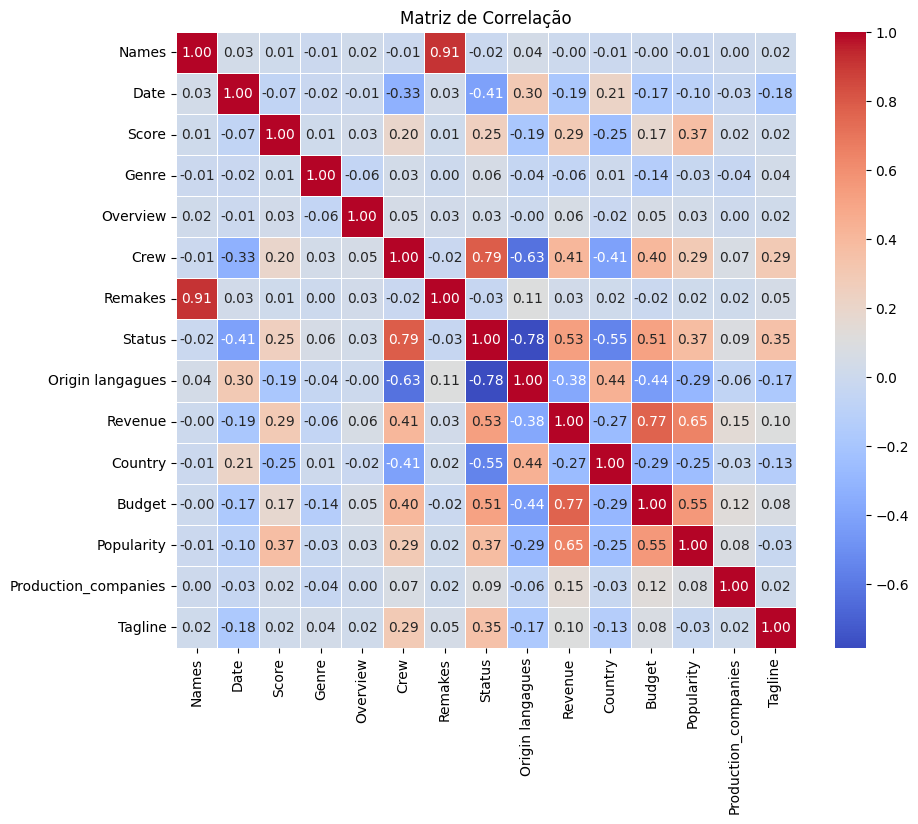

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular a matriz de correlação
correlation_matrix = df_resultado.corr()

# controi a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [36]:
#Apos a analise profunda para se chegar de facto a recomendar filmes com respeito a popularity, foi analisado um por um cada, atributo...
#...Verificou-se que o atributo Remakes tem uma alta correlação com o atributo names como verificado na matriz, o que não pode porque...
#Pode levar ao mal aprendizado do modelo
columns_to_drop = ['Remakes', 'Tagline', 'Production_companies', 'Origin langagues', 'Overview', 'Names']
df = df_resultado.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5843 entries, 0 to 5842
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5843 non-null   float64
 1   Score       5843 non-null   float64
 2   Genre       5843 non-null   float64
 3   Crew        5843 non-null   float64
 4   Status      5843 non-null   float64
 5   Revenue     5843 non-null   float64
 6   Country     5843 non-null   float64
 7   Budget      5843 non-null   float64
 8   Popularity  5843 non-null   float64
dtypes: float64(9)
memory usage: 411.0 KB


In [16]:
#Treinamento do modelo (Regressão linear multipla)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

# Substitua 'DatasetComplet3' pelo nome real do seu DataFrame
colunas_categoricas = ['Genre','Status', 'Country', 'Crew','Production_companies','Origin langagues']
colunas_numericas = ['Score', 'Revenue', 'Budget', 'Popularity']

df_resultado = pd.read_csv('DatasetComplet3.csv')

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder para cada coluna categórica
for coluna in colunas_categoricas:
    df_resultado[coluna] = label_encoder.fit_transform(df_resultado[coluna])

# Copiar as colunas numéricas para uso posterior
features_numericas = df_resultado[colunas_numericas].copy()

# Separar colunas categóricas e numéricas
data_categorico = df_resultado[colunas_categoricas]
data_numericas = df_resultado[colunas_numericas]

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Normalizar as colunas numéricas na escala de 0 a 1
data_numericas_normalizado = scaler.fit_transform(data_numericas)

# Criar DataFrame final
data_final = pd.concat([data_categorico, pd.DataFrame(data_numericas_normalizado, columns=colunas_numericas)], axis=1)

# Substituir valores nulos por 0
data_final.fillna(0, inplace=True)

# Substitua 'colunas_regressao' e 'target' pelos nomes reais das colunas e do alvo
colunas_regressao = data_final.columns.tolist()  # Use todas as colunas como variáveis independentes
colunas_regressao.remove('Popularity')  # Remova a variável de destino
target = 'Popularity'

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    data_final[colunas_regressao],
    data_final[target],
    test_size=0.01,
    random_state=43
)

# Inicializar o modelo de regressão linear
modelo_regressao = LinearRegression()

# Treinar o modelo
modelo_regressao.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_regressao.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Squared Error: 0.00021773021209912008
R-squared: 0.4955795296575558


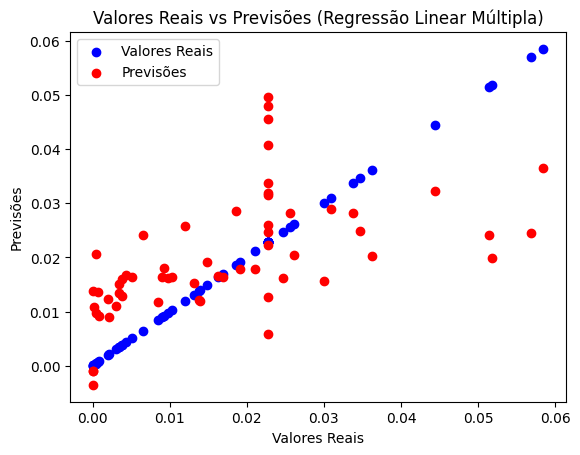

In [15]:
#Gráfico de Redes neurais 
import matplotlib.pyplot as plt

# Plotar valores reais em azul
plt.scatter(y_test, y_test, color='blue', label='Valores Reais')

# Adiciona previsões em vermelho
plt.scatter(y_test, y_pred, color='red', label='Previsões')

plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs Previsões (Regressão Linear Múltipla)")
plt.legend()
plt.show()



In [ ]:
#Regressão linear por Redes Neurais
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Definir a arquitetura da rede neural
class NeuralNetwork(nn.Module):
    def _init_(self, input_size):
        super(NeuralNetwork, self)._init_()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Substituir 'Dataset3' pelo nome real do seu DataFrame
colunas_categoricas = ['Genre', 'Status', 'Country', 'Crew', 'Production_companies', 'Origin langagues']
colunas_numericas = ['Score', 'Revenue', 'Budget', 'Popularity']

data_regressao = DatasetComplet3.copy()

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder para cada coluna categórica
for coluna in colunas_categoricas:
    data_regressao[coluna] = label_encoder.fit_transform(data_regressao[coluna])

# Copiar as colunas numéricas para uso posterior
features_numericas = data_regressao[colunas_numericas].copy()

# Separar colunas categóricas e numéricas
data_categorico = data_regressao[colunas_categoricas]
data_numericas = data_regressao[colunas_numericas]

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Normalizar as colunas numéricas na escala de 0 a 1
data_numericas_normalizado = scaler.fit_transform(data_numericas)

# Criar DataFrame final
data_final = pd.concat([data_categorico, pd.DataFrame(data_numericas_normalizado, columns=colunas_numericas)], axis=1)

# Substituir valores nulos por 0
data_final.fillna(0, inplace=True)

# Substitua 'colunas_regressao' e 'target' pelos nomes reais das colunas e do alvo
colunas_regressao = data_final.columns.tolist()  # Use todas as colunas como variáveis independentes
colunas_regressao.remove('Popularity')  # Remova a variável de destino
target = 'Popularity'

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    data_final[colunas_regressao],
    data_final[target],
    test_size=0.01,
    random_state=43
)

# Inicializar o modelo neural
input_size = len(colunas_regressao)
modelo_neural = NeuralNetwork(input_size)

# Definir otimizador e função de perda
optimizer = optim.Adam(modelo_neural.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Treinar o modelo neural
num_epochs = 100
for epoch in range(num_epochs):
    modelo_neural.train()
    
    # Converter dados para tensores
    inputs = torch.tensor(X_train.values, dtype=torch.float32)
    labels = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    
    # Forward pass
    outputs = modelo_neural(inputs)
    loss = criterion(outputs, labels)
    
    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Avaliar o desempenho do modelo neural
modelo_neural.eval()
with torch.no_grad():
    inputs_test = torch.tensor(X_test.values, dtype=torch.float32)
    y_pred_neural = modelo_neural(inputs_test).numpy()

mse_neural = mean_squared_error(y_test, y_pred_neural)
r2_neural = r2_score(y_test, y_pred_neural)

print(f'Mean Squared Error (Neural): {mse_neural}')
print(f'R-squared (Neural): {r2_neural}')

# Plotar valores reais versus previsões para cada variável
for coluna in colunas_regressao:
    plt.scatter(X_test[coluna], y_test, label=f'Reais ({coluna})', alpha=0.5)
    plt.scatter(X_test[coluna], y_pred_neural, label=f'Previsões ({coluna})', alpha=0.5)

plt.xlabel("Valores")
plt.ylabel("Previsões")
plt.legend()
plt.title("Valores Reais vs Previsões por Variável")
plt.show()

In [ ]:
# Plotar valores reais versus previsões para cada variável, gráfico para redes Neurais
for coluna in colunas_regressao:
    plt.scatter(X_test[coluna], y_test, label=f'Reais ({coluna})', alpha=0.5)
    plt.scatter(X_test[coluna], y_pred_neural, label=f'Previsões ({coluna})', alpha=0.5)

plt.xlabel("Valores")
plt.ylabel("Previsões")
plt.legend()
plt.title("Valores Reais vs Previsões por Variável")
plt.show()

In [3]:
#Regressão linear por Random-Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Substitua 'DatasetComplet3' pelo nome real do seu DataFrame
colunas_categoricas = ['Genre', 'Status', 'Country', 'Crew', 'Production_companies', 'Origin langagues']
colunas_numericas = ['Score', 'Revenue', 'Budget', 'Popularity']

df_resultado = pd.read_csv('DatasetComplet3.csv')
data_regressao = df_resultado.copy()

# Separar colunas categóricas e numéricas
data_categorico = data_regressao[colunas_categoricas]
data_numericas = data_regressao[colunas_numericas]

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder para cada coluna categórica
data_categorico_encoded = data_categorico.apply(lambda coluna: label_encoder.fit_transform(coluna))

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Normalizar as colunas numéricas na escala de 0 a 1
data_numericas_normalizado = scaler.fit_transform(data_numericas)

# Criar DataFrame final
data_final = pd.concat([data_categorico_encoded, pd.DataFrame(data_numericas_normalizado, columns=colunas_numericas)], axis=1)

# Substituir valores nulos por 0
data_final.fillna(0, inplace=True)

# Substitua 'colunas_regressao' e 'target' pelos nomes reais das colunas e do alvo
colunas_regressao = data_final.columns.tolist()  # Use todas as colunas como variáveis independentes
colunas_regressao.remove('Popularity')  # Remova a variável de destino
target = 'Popularity'

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    data_final[colunas_regressao],
    data_final[target],
    test_size=0.01,
    random_state=43
)

# Criar um pré-processador para aplicar One-Hot Encoding nas variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), colunas_categoricas)
    ],
    remainder='passthrough'
)

# Criar o pipeline com o pré-processador e o modelo RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=43))
])

# Treinar o modelo no conjunto de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0001072885155776148
R-squared: 0.7514422873690765


c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


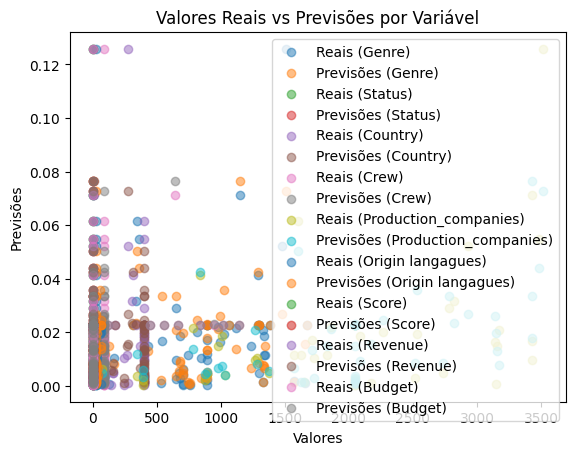

In [4]:
#Gráfico de regressão linear por Random-Forest
import matplotlib.pyplot as plt

# Plotar valores reais versus previsões para cada variável
for coluna in colunas_regressao:
    plt.scatter(X_test[coluna], y_test, label=f'Reais ({coluna})', alpha=0.5)
    plt.scatter(X_test[coluna], y_pred, label=f'Previsões ({coluna})', alpha=0.5)

plt.xlabel("Valores")
plt.ylabel("Previsões")
plt.legend()
plt.title("Valores Reais vs Previsões por Variável")
plt.show()
